<a href="https://colab.research.google.com/github/Varun-Singhal/Neural-Network/blob/master/Yolo_Basic_3C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 300
l = 10
num_filter = 20

In [0]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train.shape

(50000, 32, 32, 3)

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=8)

In [0]:
input = Input(shape=(img_height, img_width, channel,))

#Block1

layer1 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(input)
layer2 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer1)
layer3 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer2)
layer4 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer3)
layer5 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer4)
#layer_x1 = BatchNormalization()(layer5)

layer6 = MaxPooling2D((2,2))(layer5)

#Block2

layer7 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer6)
layer8 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer7)
layer9 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer8)
layer10 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer9)
layer11 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer10)
#layer_x2 = BatchNormalization()(layer11)

layer12 = MaxPooling2D((2,2))(layer11)

#Block3

layer13 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer12)
layer14 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer13)
layer15 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer14)
layer16 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer15)
layer17 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer16)
#layer_x3 = BatchNormalization()(layer17)

layer18 = MaxPooling2D((2,2))(layer17)

#Block4

layer19 = Conv2D(32,(3,3),padding='same',strides=(1,1),activation='relu')(layer18)
layer20 = Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu')(layer19)
layer21 = Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu')(layer20)
layer22 = Conv2D(256,(3,3),padding='same',strides=(1,1),activation='relu')(layer21)
layer23 = Conv2D(512,(3,3),padding='same',strides=(1,1),activation='relu')(layer22)

#layer_x4 = BatchNormalization()(layer23)

layer24 = MaxPooling2D((2,2))(layer23)

#Concatenation
layer = Lambda(space_to_depth_x2)(layer6)
layer25 = concatenate([layer,layer24])

#Flatten

flatten = Flatten()(layer24)
output = Dense(num_classes, activation='softmax')(flatten)

In [16]:
model = Model(inputs=[input], outputs=[output])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 512)       0         
__________

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 232s 5ms/step - loss: 2.3052 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.0991 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 228s 5ms/step - loss: 2.3028 - acc: 0.1009 - val_loss: 2.3027 - 

In [19]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save the trained weights in to .h5 format
model.save_weights("Yolo_Basic_model2.h5")
print("Saved the model to disk")

10000/10000 [==============================] - 13s 1ms/step
Test loss: 2.3026767192840576
Test accuracy: 0.1
Saved the model to disk


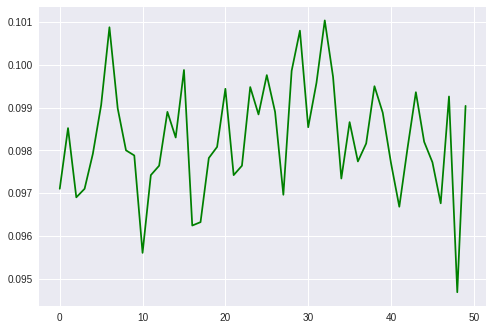

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],'g')
plt.show()

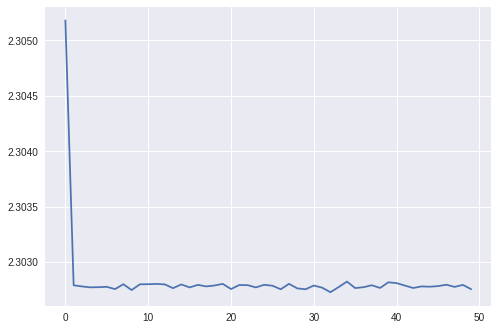

In [36]:
plt.plot(history.history['loss'])
plt.show()